## Electric-cycles sharing company (masked): Hypothesis Testing

### About an electric-cycles sharing company (masked)

An electric-cycles sharing company offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, this company provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

The company zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

The electric-bike sharing company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Problem Statement

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands?

In [1]:
#Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing and reading the data:
df = pd.read_csv('Electric-cycles_sharing_company.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
# Structure of data(rows and columns)
df.shape

(10886, 12)

In [4]:
# Columns in data
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
# Characteristics of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Statistical information for data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# Check for null values in data
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# Unique attributes for each column
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
# Unique value counts for categorical variables
column = ['season', 'holiday', 'workingday', 'weather']
df[column].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

### Observation

1. The data contains 10886 rows and 12 columns.
2. There are no missing values in the data.
3. Seasons are given in integer form that represents (1: spring, 2: summer, 3: fall, 4: winter)
4. Weather are given in integer form that represents (1: Clear, Few clouds, partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
5. Workingday and holiday are 0(False) and 1(True).
6. Non-holiday is the day when users use the maximum number of electric cycles.
7. When the weather is 1: Clear, Few clouds, partly cloudy the users tend to use the maximum number of electric cycles.
8. Users tend to use a maximum number of electric cycles on working days.

### Co-relation and distribution of data 

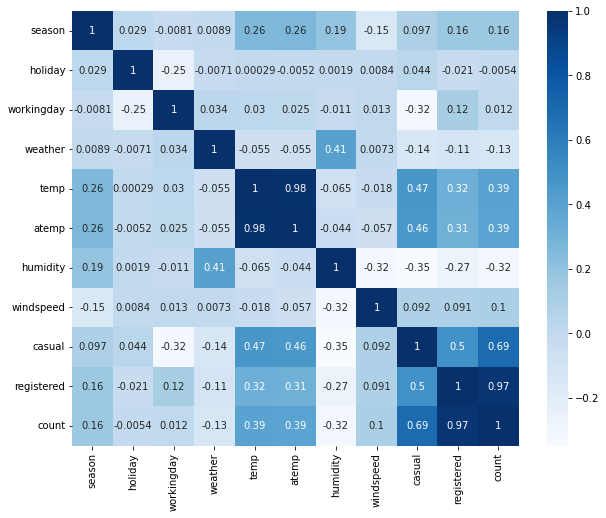

In [10]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

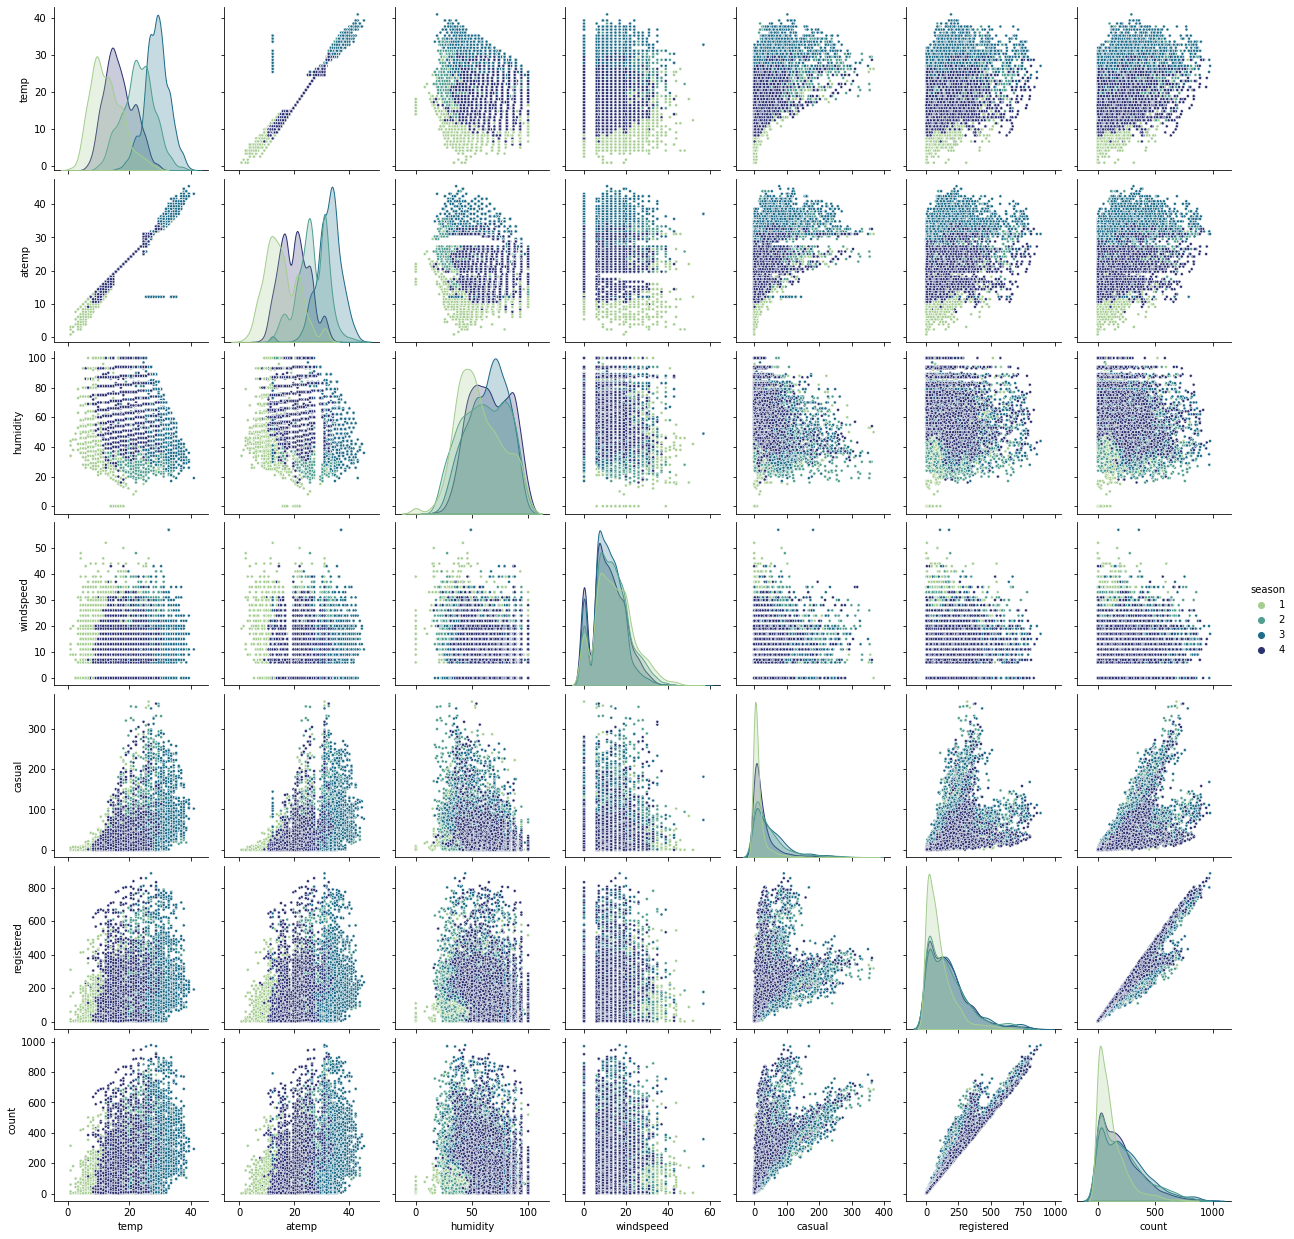

In [11]:
sns.pairplot(df[['season', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']], hue='season', palette='crest' , markers=".")
plt.show()

### Observation

1. There seem to be fewer users when the temperature is less than 10, which means most users prefer an electric cycle when the temperature is higher.
2. The chance of users using a cycle increases when the humidity level is higher than 25.
3. Windspeed exceeding 40 results in fewer electric cycles being used by users.

### Outlier detection using Inter-Quartile Range(IQR) method

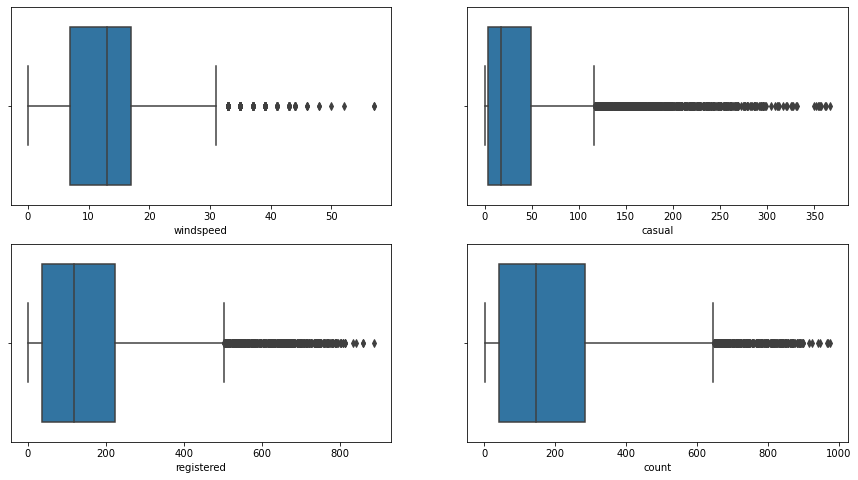

In [12]:
# Boxplot to detect outliers
fig, axis = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(x=df['windspeed'], ax=axis[0,0])
sns.boxplot(x=df['casual'], ax=axis[0,1])
sns.boxplot(x=df['registered'], ax=axis[1,0])
sns.boxplot(x=df['count'], ax=axis[1,1])
plt.show()

In [13]:
# calculate the IQR for casual
q1 = df['casual'].quantile(0.25)
q3 = df['casual'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for casual variable is:',(lower_limit, upper_limit))

Lower and Upper limits for casual variable is: (-63.5, 116.5)


In [14]:
# calculate the IQR for registered
q1 = df['registered'].quantile(0.25)
q3 = df['registered'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for registered variable is:',(lower_limit, upper_limit))

Lower and Upper limits for registered variable is: (-243.0, 501.0)


In [15]:
# calculate the IQR for count
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for count variable is:',(lower_limit, upper_limit))

Lower and Upper limits for count variable is: (-321.0, 647.0)


### Observation

1. As per the Inter-Quartile range method, the values greater than the upper limit are considered as outliers.
2. The boxplots above show that the windspeed, casual, registered, and count columns have outliers.

### Univariate analysis

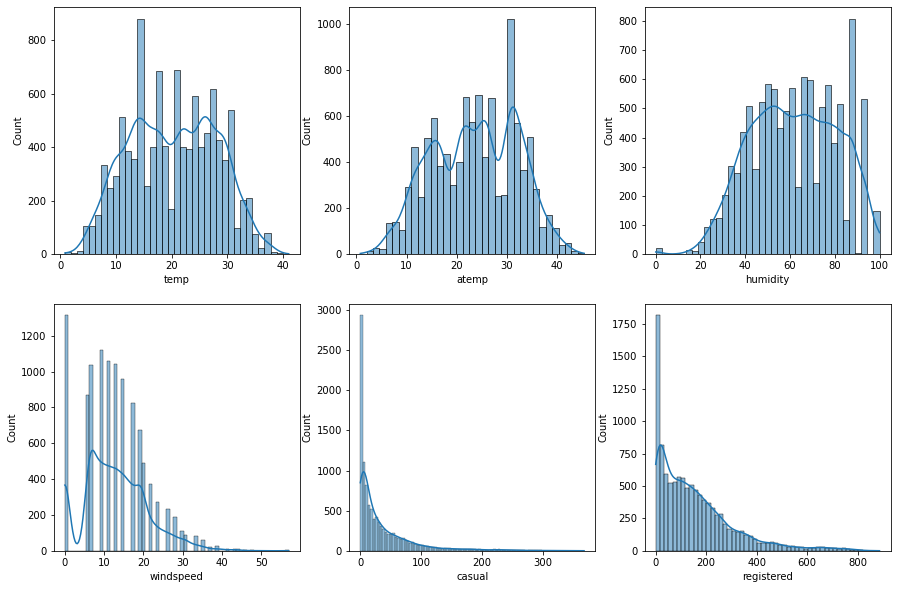

In [16]:
# Univariate analysis for each continuous variables
cont_var = ['temp','atemp','humidity','windspeed','casual','registered']
fig, axis = plt.subplots(2,3,figsize=(15, 10))
count = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[cont_var[count]], ax=axis[row,col], kde=True)
        count+=1
plt.show()

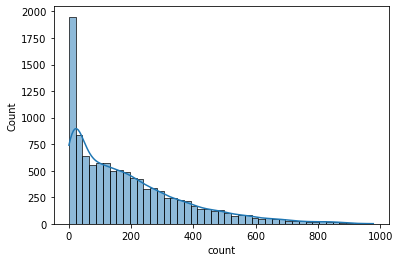

In [17]:
sns.histplot(df['count'], kde=True)
plt.show()

### Observation

1. The histplot shows distribution for each continuous variables.
2. The casual, registered, and count variables does not follow normal distribution it can be observed as a lognormal distribution.

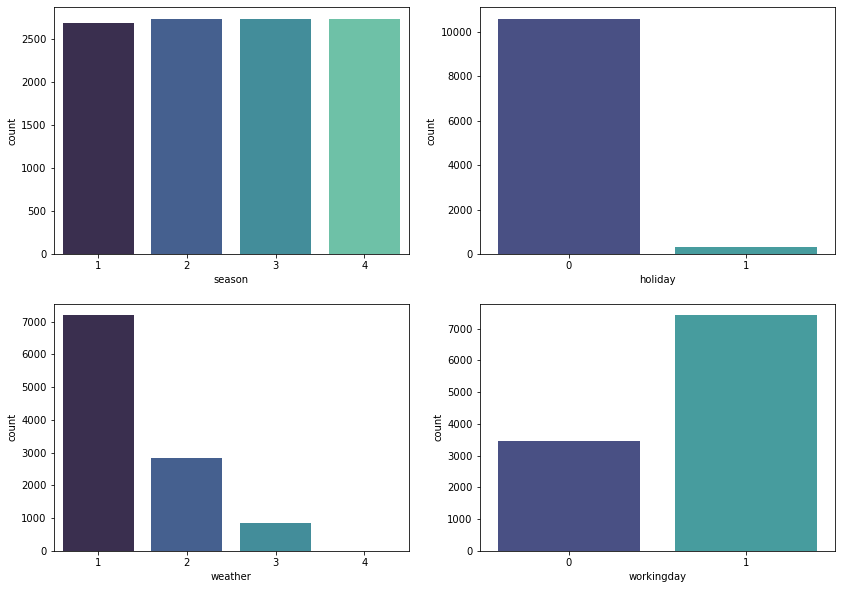

In [18]:
# Univariate analysis for each categorical variables
fig, axis = plt.subplots(2,2,figsize=(14,10))
sns.countplot(x=df['season'], palette = "mako", ax=axis[0,0])
sns.countplot(x=df['holiday'], palette = "mako", ax=axis[0,1])
sns.countplot(x=df['weather'], palette = "mako", ax=axis[1,0])
sns.countplot(x=df['workingday'], palette = "mako", ax=axis[1,1])
plt.show()

### Observation

1. For traveling, electric cycles are equally popular in each season.
2. Non-holidays are the days when the highest number of users use electric cycles.
3. Weather 1: Clear, few clouds, partly cloudy is preferred mainly by users where the number of electric cycles used is maximum.
4. During weather conditions 3:(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and 4:(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), users tend to use very few electric cycles.
5. The users mostly use the electric cycle when there are working days (weekdays) than non-working days (weekends).

### Bivariate analysis

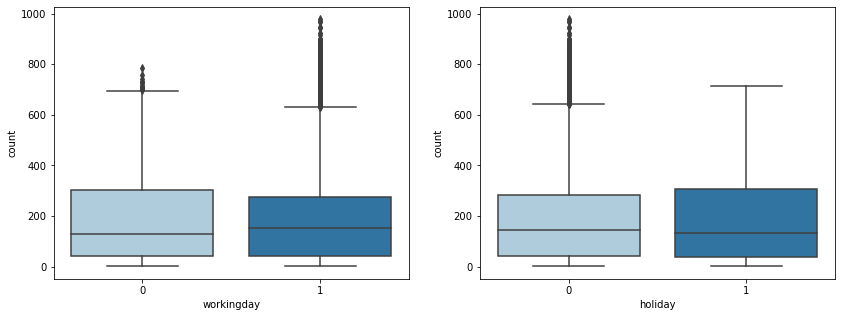

In [19]:
# Boxplot for working day and holiday
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['workingday'], y=df['count'], palette='Paired', ax=axis[0])
sns.boxplot(x=df['holiday'], y=df['count'], palette='Paired', ax=axis[1])
plt.show()

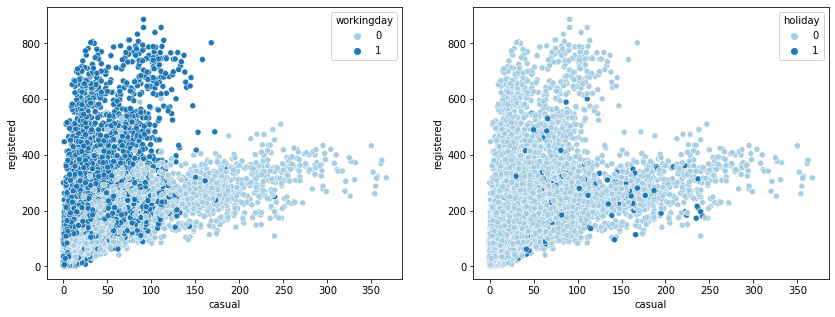

In [20]:
# Relation between casual and registered user on working day and holiday
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(x=df['casual'], y=df['registered'],hue=df['workingday'], palette='Paired', ax=axis[0])
sns.scatterplot(x=df['casual'], y=df['registered'],hue=df['holiday'], palette='Paired', ax=axis[1])
plt.show()

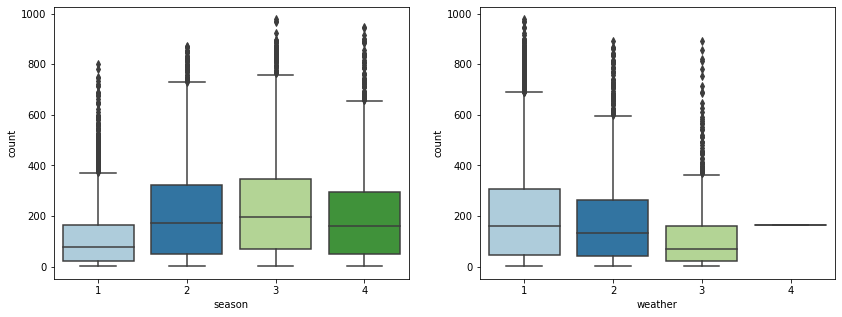

In [21]:
# Boxplot for season and weather
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['season'], y=df['count'], palette='Paired', ax=axis[0])
sns.boxplot(x=df['weather'], y=df['count'], palette='Paired', ax=axis[1])
plt.show()

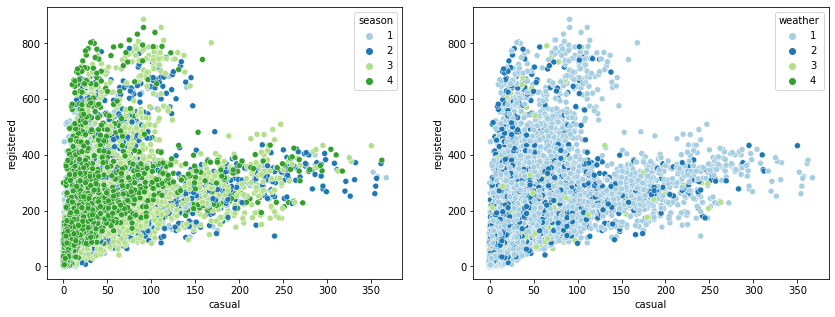

In [22]:
# Relation between casual and registered user on seasons and weather conditions
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(x=df['casual'], y=df['registered'],hue=df['season'], palette='Paired', ax=axis[0])
sns.scatterplot(x=df['casual'], y=df['registered'],hue=df['weather'], palette='Paired', ax=axis[1])
plt.show()

### Observation

1. More than 400+ registered users use the electric cycles on working days (weekdays) for their working purpose.
2. On days when there are non-working days (weekends), casual users are more likely to use the electric cycle.
3. In comparison with holidays, the number of registered and casual users is higher during non-holidays.
4. The distribution for both registered and casual users seems equal for all seasons.
5. Both registered and casual users mostly prefer to use electric cycles when the weather is 1: (clear, few clouds, partly cloudy). Also, weather 2: (Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist) is the second most preferred weather where users are most active. 

### Hypothesis testing

### Levene’s test to check the variances of the groups are equal

- Defining null and alternate hypothesis
- Null hypothesis H0: The variances of the groups are equal
- Alternate hypothesis H1: The variances of the groups are not equal
- Significance level (alpha) = 0.05

In [23]:
weekday = df[df['workingday']==1]['count'].values
weekend = df[df['workingday']==0]['count'].values
# Importing stats library to perform test
from scipy.stats import levene
test_stat, p_value = levene(weekday, weekend)
test_stat, p_value

(0.004972848886504472, 0.9437823280916695)

In [24]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Fail to reject null hypothesis H0


### Observation

1. Test statistic result = 0.004972848886504472
2. P-value = 0.9437823280916695
3. Based on the test statistic result and P-value, we can conclude that the variances of the groups are equal.

### Shapiro-wilk test to check if count of rental electric cycles forms a normal distribution

- Defining null and alternate hypothesis
- Null hypothesis H0: The count of rental electric cycles a normal distribution.
- Alternate hypothesis H1: The count of rental electric cycles does not form a normal distribution.
- Significance level (alpha) = 0.05

In [25]:
# Importing stats library to perform test
from scipy.stats import shapiro
count_data = df['count'].values
test_stat, p_value = shapiro(count_data)
test_stat, p_value

C:\Users\Prasad\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8783667087554932, 0.0)

In [26]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Reject null hypothesis H0


### Observation

1. Test statistic result = 0.8783667087554932
2. P-value = 0.0
3. Based on the test statistic result and P-value, we would reject the null hypothesis and conclude that the count of rental electric cycles does not form a normal distribution.
4. Histplot above for count of rental electric cycles also showed that it doesn't form normal distribution.

### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [27]:
# Dividing the working day column in two group to run 2-sample T-test
weekday = df[df['workingday']==1]['count'].values
weekend = df[df['workingday']==0]['count'].values

It is important to check whether the variances of the two groups being compared are equal before conducting a two-sample t-test. This is because the t-test makes assumptions about the variances of the two groups being equal.

In [28]:
# Checking difference between both variance
np.var(weekday), np.var(weekend)

(34040.69710674686, 30171.346098942427)

- Defining null and alternate hypothesis
- Null hypothesis H0: Workingday has no effect on number of electric cycles rented
- Alternate hypothesis H1: Workingday has effect on number of electric cycles rented
- Significance level (alpha) = 0.05

In [29]:
# Importing stats library to perform test
import scipy.stats as stats
test_stat, p_value = stats.ttest_ind(a=weekday, b=weekend, equal_var=False)
test_stat, p_value

(1.2362580418223226, 0.21640312280695098)

In [30]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Fail to reject null hypothesis H0


### Observation

1. Test statistic result = 1.2362580418223226
2. P-value = 0.21640312280695098
3. Here p-value is greater than the significance value.
4. By this test we can say that we fail to reject the null hypothesis and conclude that workingday has no effect on number of electric cycles rented.

### ANNOVA test to check if number of cycles rented similar or different in different seasons

- Defining null and alternate hypothesis
- Null hypothesis H0: There is no significant difference in the number of cycles rented among the different seasons.
- Alternate hypothesis H1: There is a significant difference in the number of cycles rented among the different seasons.
- Significance level (alpha) = 0.05

In [31]:
# Creating groups for each seasons 
s1 = df[df['season']==1]['count'].values
s2 = df[df['season']==2]['count'].values
s3 = df[df['season']==3]['count'].values
s4 = df[df['season']==4]['count'].values

In [32]:
# Checking difference between variance
np.var(s1), np.var(s2), np.var(s3), np.var(s4)

(15687.725805298038,
 36853.522249306465,
 38854.295089130974,
 31538.180550642726)

In [33]:
# Importing stats library to perform test
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(s1, s2, s3, s4)
test_stat, p_value

(236.94671081032106, 6.164843386499654e-149)

In [34]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Reject null hypothesis H0


 ### Observation

1. Test statistic result = 236.94671081032106
2. P-value = 6.164843386499654e-149
3. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
4. And we can conclude that the alternative hypothesis, which in this case is that there is a significant difference in the number of cycles rented among the different seasons.

### ANNOVA test to check if number of cycles rented similar or different in different weather

- Defining null and alternate hypothesis
- Null hypothesis H0: There is no significant difference in number of cycles rented similar or different in different weather.
- Alternate hypothesis H1: There is significant difference in number of cycles rented similar or different in different weather.
- Significance level (alpha) = 0.05

In [35]:
# Creating groups for each weather
w1 = df[df['weather']==1]['count'].values
w2 = df[df['weather']==2]['count'].values
w3 = df[df['weather']==3]['count'].values
w4 = df[df['weather']==4]['count'].values

In [36]:
# Importing stats library to perform test
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(w1, w2, w3, w4)
test_stat, p_value

(65.53024112793271, 5.482069475935669e-42)

In [37]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Reject null hypothesis H0


 ### Observation

1. Test statistic result = 65.53024112793271
2. P-value = 5.482069475935669e-42
3. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
4. And we can conclude that the alternative hypothesis, which in this case is that there is a significant difference in the number of cycles rented among the different weather.

### Chi-square test to check if weather is dependent on season

- Defining null and alternate hypothesis
- Null hypothesis H0: Weather and Seasons are independent.
- Alternate hypothesis H1: Weather and Seasons are dependent.
- Significance level (alpha) = 0.05

In [38]:
# Create a contingency table
data = pd.crosstab(df['weather'], df['season'])
data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [39]:
# Importing stats library to perform test
from scipy.stats import chi2_contingency
chi_stats, p_value, dof, expected = chi2_contingency(data)
(chi_stats, p_value, dof)

(49.15865559689363, 1.5499250736864862e-07, 9)

In [40]:
# Conclusion based on p-value
alpha = 0.05
if p_value > alpha:
    print('Fail to reject null hypothesis H0')
else:
    print('Reject null hypothesis H0')

Reject null hypothesis H0


### Observation

1. Test statistic result = 49.15865559689363
2. P-value = 1.5499250736864862e-07
3. Degree of freedom = 9
4. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
5. And we can conclude that the alternative hypothesis, which in this case is that Weather and Seasons are dependent.

### Solution for problem statement

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    - The variables that are significant in predicting the demand for shared electric cycles in the Indian market could be:
        - Working days (weekdays or weekends)
        - Season (spring, summer, fall, winter))
        - Weather conditions (clear, mist + cloudy, snow, rain, thunderstorm + scattered clouds, fog)
        - Holiday (festival, religious holiday)
        - Temperature (warm, cold)


2. How well those variables describe the electric cycle demands?
    - To understand how well these variables describe the demand for electric cycles we ran some statistical test where we conclude:
    - The variances of the groups (weekday and weekend) are equal.
    - With the help shapiro-wilk test we conclude that the count of rental electric cycles does not form a normal distribution.
    - With the help of 2 sample T-test we can conclude that workingday has no effect on number of electric cycles rented.
    - With the help of ANNOVA test we can conclude that there is a significant difference in the number of cycles rented among the different seasons.
    - With the help of ANNOVA test we can conclude that there is a significant difference in the number of cycles rented among the different weathers.
    - With the help of Chi-square test we can conclude that weather and season are dependent.

### Recommendations

1. Offers, discounts, and promotions will encourage customers to rent electric cycles.
2. Develop loyalty programs and rewards for frequent users to encourage repeat usage and build a loyal user base.
3. Can offer different pricing ranges based on the type of user, such as daily, weekly or monthly, or flexible options for long-term users.
4. Boost awareness and the benefits of using electric cycles.
5. Ensure that electric cycles are available enough to meet the demand, and also keep them well-maintained to ensure that they are in proper working condition.